# Ejercicio voluntario: Modelo de un cohete
Vimos en clase que el siguiente problema de Cauchy modela la evolución de un cohete con motor:
$$ \begin{cases}
\frac{dx}{dt} = v\cos(\theta) \\
\frac{dy}{dt} = v\sin(\theta) \\
\frac{dv}{dt} = \frac{1}{M + m_{fuel}} (T-\frac{1}{2}c\rho sv^2) - g\sin(\theta) - \frac{1}{M + m_{fuel}} \frac{dm_{fuel}}{dt} \\
\frac{d\theta}{dt} = -\frac{g}{v}\cos(\theta) \\
\frac{dm_{fuel}}{dt} = -kT \\
x(0) = 0, \quad y(0) = 0, \quad v(0) = v_0, \quad \theta(0) = \theta_0, \quad m_{fuel}(0) = m_0
\end{cases} $$
donde:
* $(x(t), y(t))$ denota el punto donde se encuentra el centro de gravedad del cohete en el instante de tiempo $t$.
* $θ(t) (rad)$ es el ángulo que forma $(x(t), y(t))$ con el plano horizontal.
* $v(t) (m/s)$ es el módulo de la velocidad del cohete.
* $g = 9.81 (m/s^2)$ es la constante gravitatoria.
* $\rho (kg/m)$ es la densidad del aire.
* $c$ es el coeficiente adimensional de arrastre que cuantifica la resistencia con el aire.
* $s (m^2)$ es el área media de la sección transversal del cohete.
* $M + m_{fuel} (t) (kg)$ es la masa total del cohete, que incluye la masa del combustible $m_{fuel} (t)$.
* $T(t) (kg m/s^2)$ es la fuerza de empuje del cohete.
* La velocidad a la que se consume el combustible es proporcional al empuje y $k (s/m)$ es la constante de proporcionalidad.
* El origen de coordenadas $(0, 0)$ es el punto de lanzamiento.
* $v_0$ es la velocidad inicial.
* $\theta_0$ es el ángulo inicial.
* $m_0$ es la masa inicial de combustible.

Supondremos que la fuerza que ejerce el motor es de la forma
$$ T(t) =
\begin{cases}
T_0 & si m_{fuel}(t) > 0 \\
0 & \text{en otro caso}
\end{cases} $$
donde $T_0 \geq 0$ es constante (es decir, la fuerza del motor es constante siempre que quede combustible en el depósito: una vez que éste se consume, el motor se para).

In [1]:
from numpy import *
from matplotlib.pyplot import *

def rk4(a, fun, h, w0):
    t = array([a])
    y = zeros([len(w0), 1])
    y[:, 0] = w0
    k = 0

    while y[1, k] >= 0:
        t = append(t, t[k] + h)
        k1 = fun(t[k], y[:, k])
        k2 = fun(t[k] + h/2, y[:, k] + h/2 *k1)
        k3 = fun(t[k] + h/2*h, y[:, k] + h/2 *k2)
        k4 = fun(t[k+1], y[:, k] + h*k3)
        y = column_stack((y, y[:, k] + h/6 *(k1 + 2*k2 + 2*k3 + k4)))
        k += 1
    
    return (t, y)

## Ejercicio 1
Supongamos que
$$ v_0 = 50, \quad \theta_0 = \frac{\pi}{4}, \quad m_0 = 7.5, \quad c = 0.2, \quad \rho = 1.29, \quad s = 0.25, \quad M = 7.5, \quad k = 0.01, \quad T_0 = 50 $$
Resuelva el problema usando el método de Runge-Kutta de cuarto orden en el intervalo $[0, t_1]$, siendo $t_1 > 0$ el instante en el que el cohete cae, es decir $y(t_1) = 0$. Dibuje la trayectoria del cohete en el plano $x$, y así como las gráficas de $v(t)$ y $m_{fuel}(t)$ en el intervalo de tiempo $[0, t_1]$. ¿Cuáles son, aproximadamente, el alcance y la máxima altura del cohete?

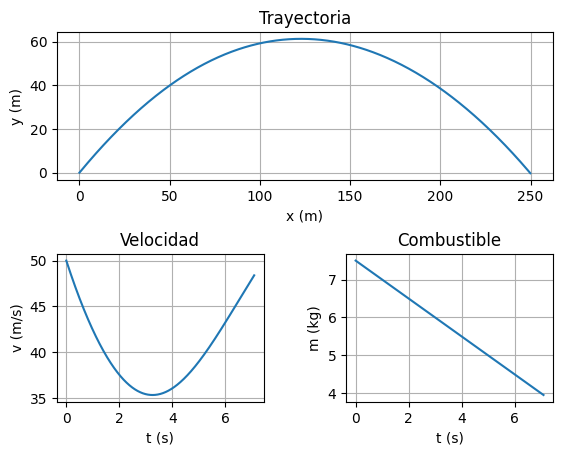

> Alcance aproximado: 249.91 metros
> Altura máxima aproximada: 61.25 metros


In [2]:
def f(t, w, T0 = 50, c = 0.2):
    (x, y, v, θ, m_fuel) = w

    if (m_fuel > 0):
        T = T0
    else:
        T = 0

    dx = v*cos(θ)
    dy = v*sin(θ)
    dm = -0.01*T
    dv = 1/(7.5 + m_fuel) * (T - 1/2 * c*1.29*0.25*v**2) - 9.81*sin(θ) - 1/(7.5 + m_fuel) * dm
    dθ = -9.81/v * cos(θ)

    return array([dx, dy, dv, dθ, dm])

a = 0
h = 0.01
w0 = array([0, 0, 50, pi/4, 7.5])
(t, y) = rk4(a, f, h, w0)

# Dibujamos la trayectoria del cohete
subplot(211)
plot(y[0, :], y[1, :])
title("Trayectoria")
xlabel("x (m)")
ylabel("y (m)")
grid(True)

# Dibujamos la gráfica de la velocidad
subplot(223)
plot(t, y[2, :])
title("Velocidad")
xlabel("t (s)")
ylabel("v (m/s)")
grid(True)

# Dibujamos la gráfica del combustible
subplot(224)
plot(t, y[4, :])
title("Combustible")
xlabel("t (s)")
ylabel("m (kg)")
grid(True)

subplots_adjust(hspace=0.5, wspace=0.4)
show()

# Aproximamos los valores del alcance y la altura máxima
print("> Alcance aproximado:", around(max(y[0, :]), 2), "metros")
print("> Altura máxima aproximada:", around(max(y[1, :]), 2), "metros")

## Ejercicio 2
Resuelva el problema cambiando los siguientes datos:
1. $T_0 = 0, c = 0$.
2. $T_0 = 0, c = 0.2$.
3. $T_0 = 10, c = 0.2$.
4. $T_0 = 50, c = 0$.
5. $T_0 = 50, c = 0.2$.

Compare en una gráfica todas las trayectorias obtenidas.

In [3]:
# Apartado A
def f1(t, w):
    return f(t, w, 0, 0)

# Apartado B
def f2(t, w):
    return f(t, w, 0, 0.2)

# Apartado C
def f3(t, w):
    return f(t, w, 10, 0.2)

# Apartado D
def f4(t, w):
    return f(t, w, 50, 0)

# Apartado E
def f5(t, w):
    return f(t, w, 50, 0.2)

apartados = ["A", "B", "C", "D", "E"]
funciones = [f1, f2, f3, f4, f5]


Apartado 2A


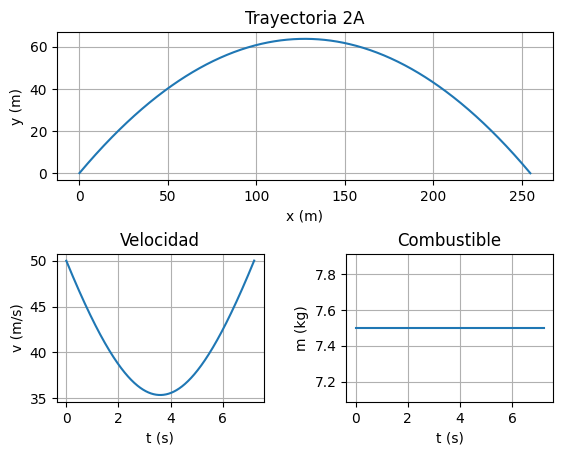

> Alcance aproximado: 254.91 metros
> Altura máxima aproximada: 63.71 metros

Apartado 2B


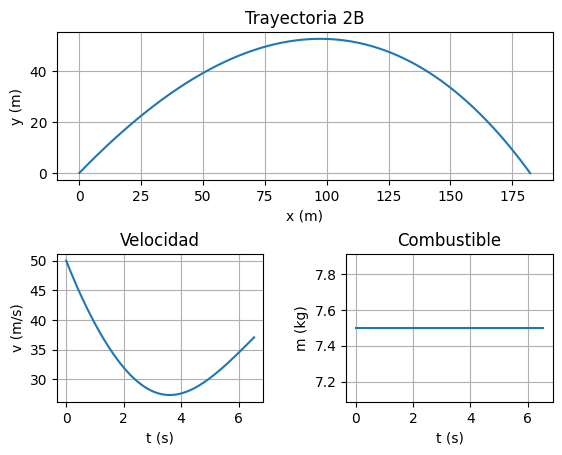

> Alcance aproximado: 182.23 metros
> Altura máxima aproximada: 52.57 metros

Apartado 2C


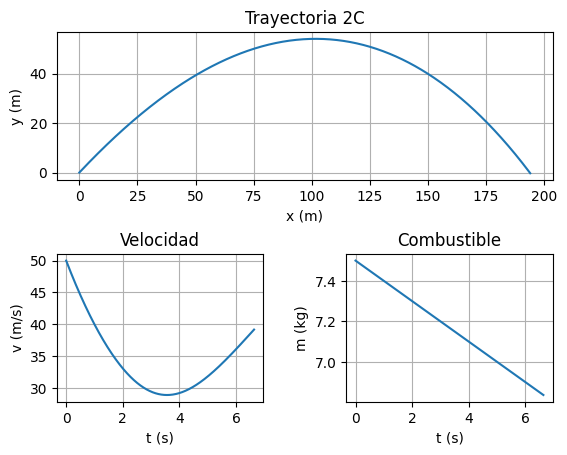

> Alcance aproximado: 194.06 metros
> Altura máxima aproximada: 54.13 metros

Apartado 2D


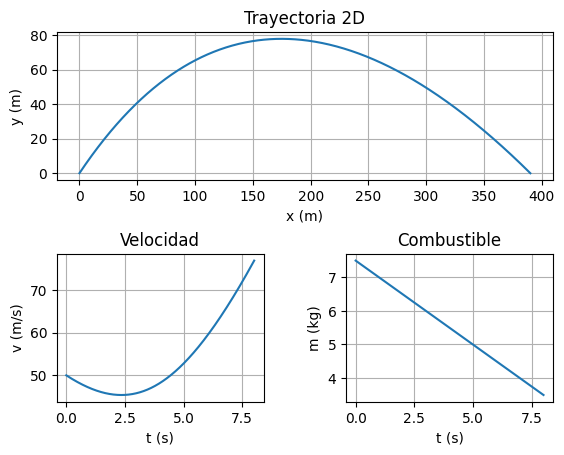

> Alcance aproximado: 390.09 metros
> Altura máxima aproximada: 77.86 metros

Apartado 2E


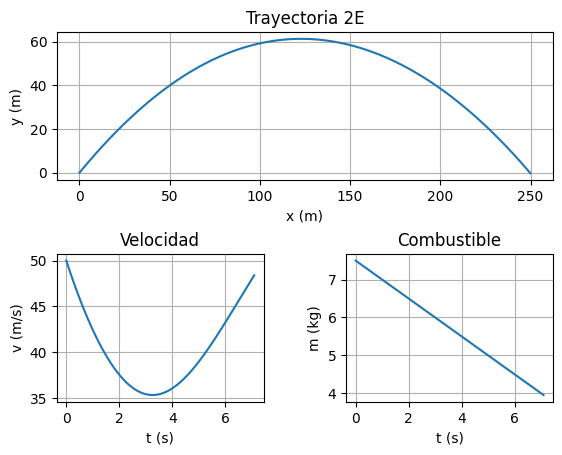

> Alcance aproximado: 249.91 metros
> Altura máxima aproximada: 61.25 metros


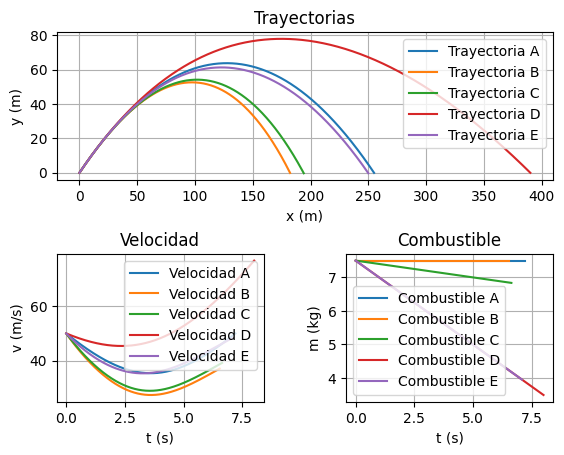

In [4]:
w0 = array([0, 0, 50, pi/4, 7.5])

for (apartado, funcion) in zip(apartados, funciones):
    print("\nApartado 2" + apartado)

    (t, y) = rk4(a, funcion, h, w0)

    # Dibujamos la trayectoria del cohete
    subplot(211)
    plot(y[0, :], y[1, :])
    title("Trayectoria 2" + apartado)
    xlabel("x (m)")
    ylabel("y (m)")
    grid(True)

    # Dibujamos la gráfica de la velocidad
    subplot(223)
    plot(t, y[2, :])
    title("Velocidad")
    xlabel("t (s)")
    ylabel("v (m/s)")
    grid(True)

    # Dibujamos la gráfica del combustible
    subplot(224)
    plot(t, y[4, :])
    title("Combustible")
    xlabel("t (s)")
    ylabel("m (kg)")
    grid(True)

    subplots_adjust(hspace=0.5, wspace=0.4)
    show()

    # Aproximamos los valores del alcance y la altura máxima
    print("> Alcance aproximado:", around(max(y[0, :]), 2), "metros")
    print("> Altura máxima aproximada:", around(max(y[1, :]), 2), "metros")

# Comparamos todas las gráficas
for funcion in funciones:
    (t, y) = rk4(a, funcion, h, w0)
    
    subplot(211)
    plot(y[0, :], y[1, :])
    title("Trayectorias")
    xlabel("x (m)")
    ylabel("y (m)")
    legend(["Trayectoria " + apartado for apartado in apartados])
    grid(True)

    subplot(223)
    plot(t, y[2, :])
    title("Velocidad")
    xlabel("t (s)")
    ylabel("v (m/s)")
    legend(["Velocidad " + apartado for apartado in apartados])
    grid(True)

    subplot(224)
    plot(t, y[4, :])
    title("Combustible")
    xlabel("t (s)")
    ylabel("m (kg)")
    legend(["Combustible " + apartado for apartado in apartados])
    grid(True)

subplots_adjust(hspace=0.5, wspace=0.4)
show()

## Ejercicio 3
Repita el apartado anterior con $\theta_0 = \frac{\pi}{2.1}$.


Apartado 3A


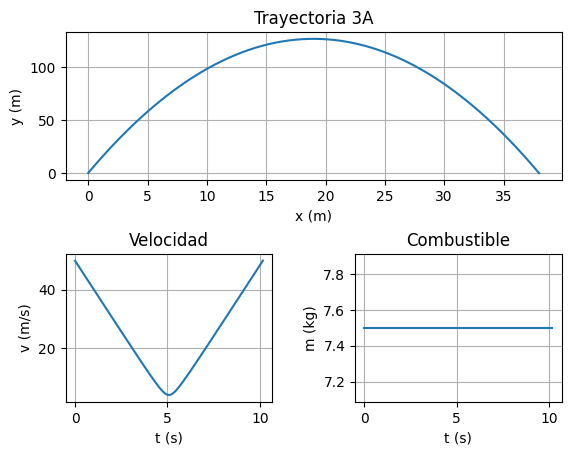

> Alcance aproximado: 38.0 metros
> Altura máxima aproximada: 126.71 metros

Apartado 3B


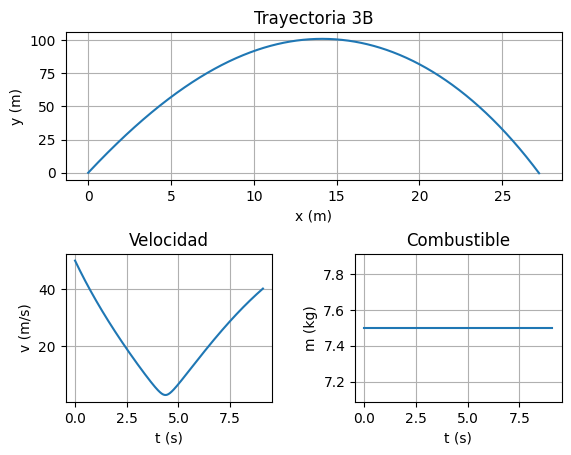

> Alcance aproximado: 27.22 metros
> Altura máxima aproximada: 101.05 metros

Apartado 3C


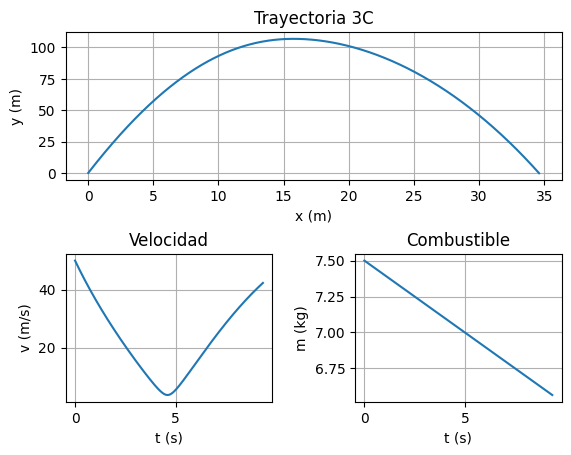

> Alcance aproximado: 34.61 metros
> Altura máxima aproximada: 106.82 metros

Apartado 3D


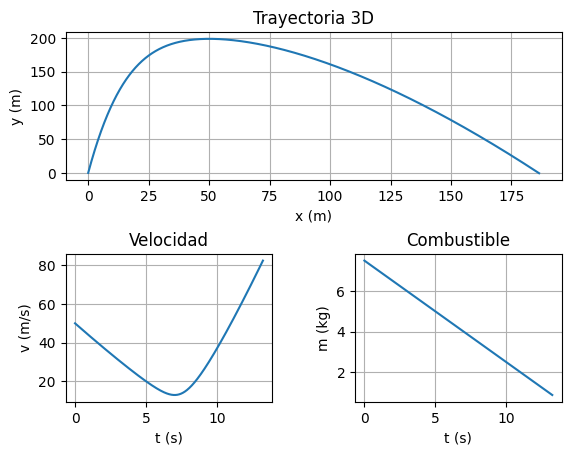

> Alcance aproximado: 186.43 metros
> Altura máxima aproximada: 198.51 metros

Apartado 3E


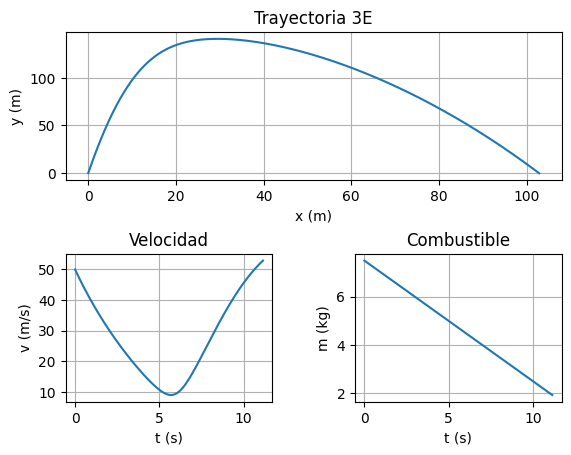

> Alcance aproximado: 102.83 metros
> Altura máxima aproximada: 140.84 metros


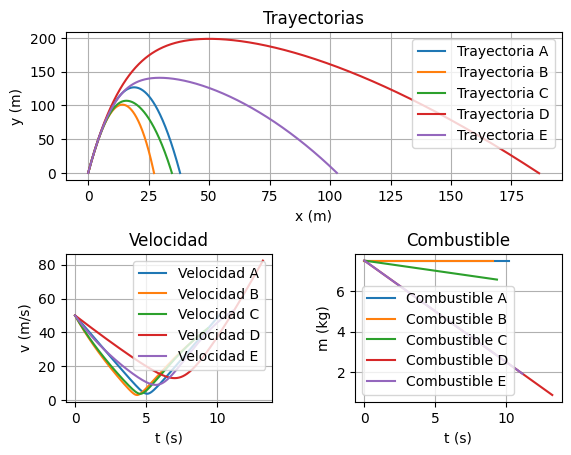

In [5]:
w0 = array([0, 0, 50, pi/2.1, 7.5])

for (apartado, funcion) in zip(apartados, funciones):
    print("\nApartado 3" + apartado)

    (t, y) = rk4(a, funcion, h, w0)

    # Dibujamos la trayectoria del cohete
    subplot(211)
    plot(y[0, :], y[1, :])
    title("Trayectoria 3" + apartado)
    xlabel("x (m)")
    ylabel("y (m)")
    grid(True)

    # Dibujamos la gráfica de la velocidad
    subplot(223)
    plot(t, y[2, :])
    title("Velocidad")
    xlabel("t (s)")
    ylabel("v (m/s)")
    grid(True)
    
    # Dibujamos la gráfica del combustible
    subplot(224)
    plot(t, y[4, :])
    title("Combustible")
    xlabel("t (s)")
    ylabel("m (kg)")
    grid(True)

    subplots_adjust(hspace=0.5, wspace=0.4)
    show()

    # Aproximamos los valores del alcance y la altura máxima
    print("> Alcance aproximado:", around(max(y[0, :]), 2), "metros")
    print("> Altura máxima aproximada:", around(max(y[1, :]), 2), "metros")

# Comparamos todas las gráficas
for funcion in funciones:
    (t, y) = rk4(a, funcion, h, w0)
    
    subplot(211)
    plot(y[0, :], y[1, :])
    title("Trayectorias")
    xlabel("x (m)")
    ylabel("y (m)")
    legend(["Trayectoria " + apartado for apartado in apartados])
    grid(True)

    subplot(223)
    plot(t, y[2, :])
    title("Velocidad")
    xlabel("t (s)")
    ylabel("v (m/s)")
    legend(["Velocidad " + apartado for apartado in apartados])
    grid(True)

    subplot(224)
    plot(t, y[4, :])
    title("Combustible")
    xlabel("t (s)")
    ylabel("m (kg)")
    legend(["Combustible " + apartado for apartado in apartados])
    grid(True)

subplots_adjust(hspace=0.5, wspace=0.4)
show()